In [ ]:
#| hide
import sys
sys.path.append("/notebooks/katlas")
from nbdev.showdoc import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from katlas.core import *
from katlas.feature import *
from katlas.plot import *
from fastbook import *
from tqdm.notebook import tqdm; tqdm.pandas()
from sklearn import set_config
set_config(transform_output="pandas")

/usr/local/lib/python3.9/dist-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/dist-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

# Get kinase features

> extract features from kinase protein sequence

With the advancement of language models in protein field, there are many models we can use to extract protein features. In this module, we use several protein large language models to get protein embeddings. 

!! Make sure the environment is in CUDA

## Data

In [ ]:
# Download the kinase info
df = Data.get_kinase_info_full().set_index('kinase')
sample = df[:5]

## ESM

The ESM-2 (Evolutionary Scale Modeling) model is a deep learning model that incorporates evolutionary information by utilizing multiple sequence alignments (MSAs) of related protein sequences. It takes the MSA as input and predicts various properties of the protein, such as secondary structure, solvent accessibility, and contact maps.

In [ ]:
# Check largest kinase
df.sort_values(by='length',ascending=False).length[:10]

kinase
TTN      32759
OBSCN     7968
OBSCN     7968
DNAPK     4128
TRRAP     3859
SMG1      3661
SPEG      3267
SPEG      3267
TRIO      3097
ATM       3056
Name: length, dtype: int64

In [ ]:
# due to the computing limit, we can only extract features from proteins with length < 1500
df1 = df.query('length<1500')

Uncheck below to implement. It will take some time to finish extraction. You can skip this step to the next if you'd like to save time

In [ ]:
# esmfeature = get_esm(df1, 'sequence')

Here's an example

In [ ]:
esmfeature = get_esm(sample,'sequence')

repr_layers number for model esm2_t33_650M_UR50D is 33.
You can also choose other esm2 models: 
esm2_t48_15B_UR50D
esm2_t36_3B_UR50D
esm2_t33_650M_UR50D
esm2_t30_150M_UR50D
esm2_t12_35M_UR50D
esm2_t6_8M_UR50D



  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
esmfeature.head()

esm_0     esm_1     esm_2     esm_3     esm_4     esm_5     esm_6  \
kinase                                                                         
AAK1   -0.004749 -0.013191 -0.023010  0.030624 -0.080566 -0.096680  0.041992   
ABL1    0.038391 -0.067932 -0.027786  0.048218 -0.048218 -0.037415  0.044800   
ABL2    0.025146 -0.064575 -0.011314  0.032776 -0.043488 -0.044037  0.049835   
TNK2    0.047913 -0.075073 -0.024475  0.073853 -0.022522 -0.050201  0.104248   
ACVR2A  0.012520 -0.105347 -0.039337  0.104980 -0.117859 -0.062225  0.158203   

           esm_7     esm_8     esm_9    esm_10    esm_11    esm_12    esm_13  \
kinase                                                                         
AAK1   -0.064941 -0.041931  0.110168 -0.030777 -0.034088  0.055481  0.126465   
ABL1    0.042358  0.062988  0.111450  0.047516 -0.033112  0.069214  0.026794   
ABL2    0.052399  0.051086  0.104248  0.043854 -0.032013  0.068787  0.063293   
TNK2    0.118591  0.073975  0.157471  0.033661 -0.001989  0.126587  0.081482   
ACVR2A -0.014977 -0.032227  0.096802 -0.004765 -0.001611  0.131104  0.182007   

          esm_14    esm_15    esm_16    esm_17    esm_18    esm_19    esm_20  \
kinase                                                                         
AAK1   -0.010590  0.190186 -0.035858  0.049164 -0.048340 -0.072754  0.011360   
ABL1    0.036407  0.107910 -0.007584  0.053741  0.022690  0.027039 -0.008118   
ABL2    0.024933  0.106384 -0.005089  0.049469  0.010956  0.018326 -0.018509   
TNK2    0.071228  0.095337  0.012558  0.036194 -0.048492  0.057587 -0.008072   
ACVR2A  0.053711  0.082886  0.047272  0.129272 -0.038849  0.048492  0.075134   

          esm_21    esm_22    esm_23    esm_24    esm_25    esm_26    esm_27  \
kinase                                                                         
AAK1   -0.021103  0.046417 -0.041687  0.078552  0.124878  0.057190 -0.040863   
ABL1    0.000617  0.058685  0.010643  0.058807  0.050659  0.027756 -0.110535   
ABL2   -0.003998  0.050537  0.017319  0.060272  0.047974  0.044861 -0.095154   
TNK2   -0.028381  0.067322 -0.073303  0.068176  0.112061 -0.006222 -0.119385   
ACVR2A -0.032562  0.121948 -0.113098  0.011810  0.118042  0.033508 -0.044922   

          esm_28    esm_29    esm_30    esm_31    esm_32    esm_33    esm_34  \
kinase                                                                         
AAK1   -0.056793 -0.118774  0.011673  0.005138  0.062927 -0.006542  0.013451   
ABL1   -0.032898 -0.104370 -0.044769  0.129517  0.015533  0.015610  0.030502   
ABL2   -0.019287 -0.123596 -0.042114  0.097168 -0.001183 -0.003990  0.023575   
TNK2   -0.046326 -0.078003 -0.104736  0.130371  0.030533  0.054626  0.061768   
ACVR2A -0.148682 -0.183960 -0.001397  0.075378  0.077332  0.015945  0.126709   

          esm_35    esm_36    esm_37    esm_38    esm_39    esm_40    esm_41  \
kinase                                                                         
AAK1    0.081848 -0.054626  0.025833 -0.020966 -0.035034  0.035522 -0.048767   
ABL1    0.062988 -0.045074  0.029556  0.030579 -0.079529  0.003910  0.022339   
ABL2    0.071533 -0.056732  0.042297  0.040955 -0.072327  0.003252  0.018890   
TNK2    0.075928 -0.079773  0.018585  0.057098 -0.054749 -0.016525 -0.002737   
ACVR2A  0.105591 -0.161987  0.037354  0.021652  0.060455 -0.051788 -0.004040   

          esm_42    esm_43    esm_44    esm_45    esm_46    esm_47    esm_48  \
kinase                                                                         
AAK1    0.108337 -0.047089 -0.055237 -0.093384 -0.022919  0.054413 -0.025772   
ABL1    0.059448 -0.058685  0.001494  0.011688  0.005825  0.025818 -0.090942   
ABL2    0.029068 -0.049622 -0.006908 -0.004513 -0.014015  0.003668 -0.085022   
TNK2    0.069458 -0.007801  0.003622 -0.048920  0.025894  0.065002  0.001122   
ACVR2A  0.178467 -0.068604 -0.042999 -0.098267 -0.044159  0.122986  0.020432   

          esm_49    esm_50    esm_51    esm_52    esm_53    esm_54    esm_55  \
kina

Let's get all esm feature of all kinases

In [ ]:
esmfeature = Data.get_esm_full().set_index('kinase')

In [ ]:
esmfeature.head()

0        1        2        3        4        5        6  \
kinase                                                                  
AAK1   -0.00470 -0.01327 -0.02286  0.03062 -0.08050 -0.09660  0.04193   
ABL1    0.03840 -0.06800 -0.02779  0.04822 -0.04825 -0.03738  0.04474   
ABL2    0.02518 -0.06450 -0.01128  0.03280 -0.04346 -0.04400  0.04980   
TNK2    0.04794 -0.07500 -0.02448  0.07380 -0.02245 -0.05017  0.10425   
ACVR2A  0.01242 -0.10530 -0.03967  0.10516 -0.11800 -0.06226  0.15860   

               7        8        9        10        11       12       13  \
kinase                                                                     
AAK1   -0.065000 -0.04193  0.11020 -0.030750 -0.034240  0.05542  0.12650   
ABL1    0.042360  0.06300  0.11150  0.047500 -0.033020  0.06934  0.02686   
ABL2    0.052370  0.05115  0.10425  0.043850 -0.032070  0.06870  0.06330   
TNK2    0.118500  0.07390  0.15750  0.033630 -0.001941  0.12660  0.08140   
ACVR2A -0.015076 -0.03250  0.09670 -0.004627 -0.001487  0.13130  0.18230   

              14       15        16       17        18       19       20  \
kinase                                                                     
AAK1   -0.010544  0.19030 -0.035900  0.04940 -0.048340 -0.07280  0.01134   
ABL1    0.036380  0.10790 -0.007534  0.05377  0.022660  0.02701 -0.00807   
ABL2    0.024930  0.10650 -0.005096  0.04940  0.010956  0.01834 -0.01842   
TNK2    0.071170  0.09534  0.012474  0.03616 -0.048460  0.05765 -0.00811   
ACVR2A  0.053770  0.08250  0.047450  0.12940 -0.038940  0.04858  0.07526   

              21       22        23       24       25       26       27  \
kinase                                                                    
AAK1   -0.021270  0.04654 -0.041750  0.07880  0.12490  0.05710 -0.04114   
ABL1    0.000603  0.05865  0.010544  0.05887  0.05066  0.02777 -0.11060   
ABL2   -0.004010  0.05057  0.017290  0.06027  0.04797  0.04486 -0.09515   
TNK2   -0.028380  0.06726 -0.073240  0.06824  0.11200 -0.00618 -0.11930   
ACVR2A -0.032700  0.12195 -0.113200  0.01166  0.11816  0.03340 -0.04526   

             28       29        30       31        32       33        34  \
kinase                                                                     
AAK1   -0.05676 -0.11870  0.011635  0.00496  0.062900 -0.00652  0.013504   
ABL1   -0.03287 -0.10440 -0.044740  0.12950  0.015434  0.01559  0.030440   
ABL2   -0.01932 -0.12360 -0.042080  0.09717 -0.001024 -0.00403  0.023640   
TNK2   -0.04623 -0.07806 -0.104740  0.13040  0.030600  0.05463  0.061770   
ACVR2A -0.14870 -0.18400 -0.001228  0.07550  0.077300  0.01591  0.127100   

             35       36       37       38       39        40        41  \
kinase                                                                    
AAK1    0.08170 -0.05470  0.02590 -0.02084 -0.03528  0.035580 -0.048740   
ABL1    0.06300 -0.04514  0.02954  0.03061 -0.07960  0.003906  0.022430   
ABL2    0.07153 -0.05676  0.04227  0.04092 -0.07240  0.003235  0.018940   
TNK2    0.07587 -0.07980  0.01855  0.05707 -0.05475 -0.016560 -0.002762   
ACVR2A  0.10560 -0.16240  0.03760  0.02171  0.06090 -0.051900 -0.003841   

             42       43        44        45        46        47        48  \
kinase                                                                       
AAK1    0.10834 -0.04684 -0.055050 -0.093400 -0.023070  0.054320 -0.025760   
ABL1    0.05942 -0.05872  0.001566  0.011696  0.005806  0.025770 -0.090900   
ABL2    0.02907 -0.04965 -0.006890 -0.004543 -0.014030  0.003778 -0.085000   
TNK2    0.06950 -0.00788  0.003588 -0.048950  0.026050  0.065060  0.001143   
ACVR2A  0.17870 -0.06854 -0.043060 -0.098450 -0.044280  0.122900  0.020420   

            49       50       51       52       53       54       55       56  \
kinase                                                                          
AAK1   -0.1615 -0.03793  0.06750  0.06235  0.04140  0.02052  0.01897 -0.01100   
ABL1   -0.1292 -0.01588  0.03653  0.08460  0.03424  0.00868  

### Plot

In [ ]:
combine = pd.concat([df1,esmfeature],axis=1)

In [ ]:
combine = combine.query('pseudo==0')

In [ ]:
feat_col = combine.columns[-1280:]

In [ ]:
# esmfeature = Data.get_esm_full()

# esmfeature = esmfeature.drop_duplicates('kinase')

# esmfeature = esmfeature.reset_index(drop=True)

# kinase = Data.get_kinase_info_full()

# kinase = esmfeature[['kinase']].merge(kinase,'left').drop_duplicates('kinase')

# kinase = kinase.reset_index(drop=True)

# (esmfeature.kinase == kinase.kinase).value_counts() # check if the kinase info match

In [ ]:
# kinase = kinase.set_index('kinase')
# esmfeature = esmfeature.set_index('kinase')

In [ ]:
feature = combine[feat_col]

In [ ]:
combine['Category'] = combine['category_big'].fillna('unknown')

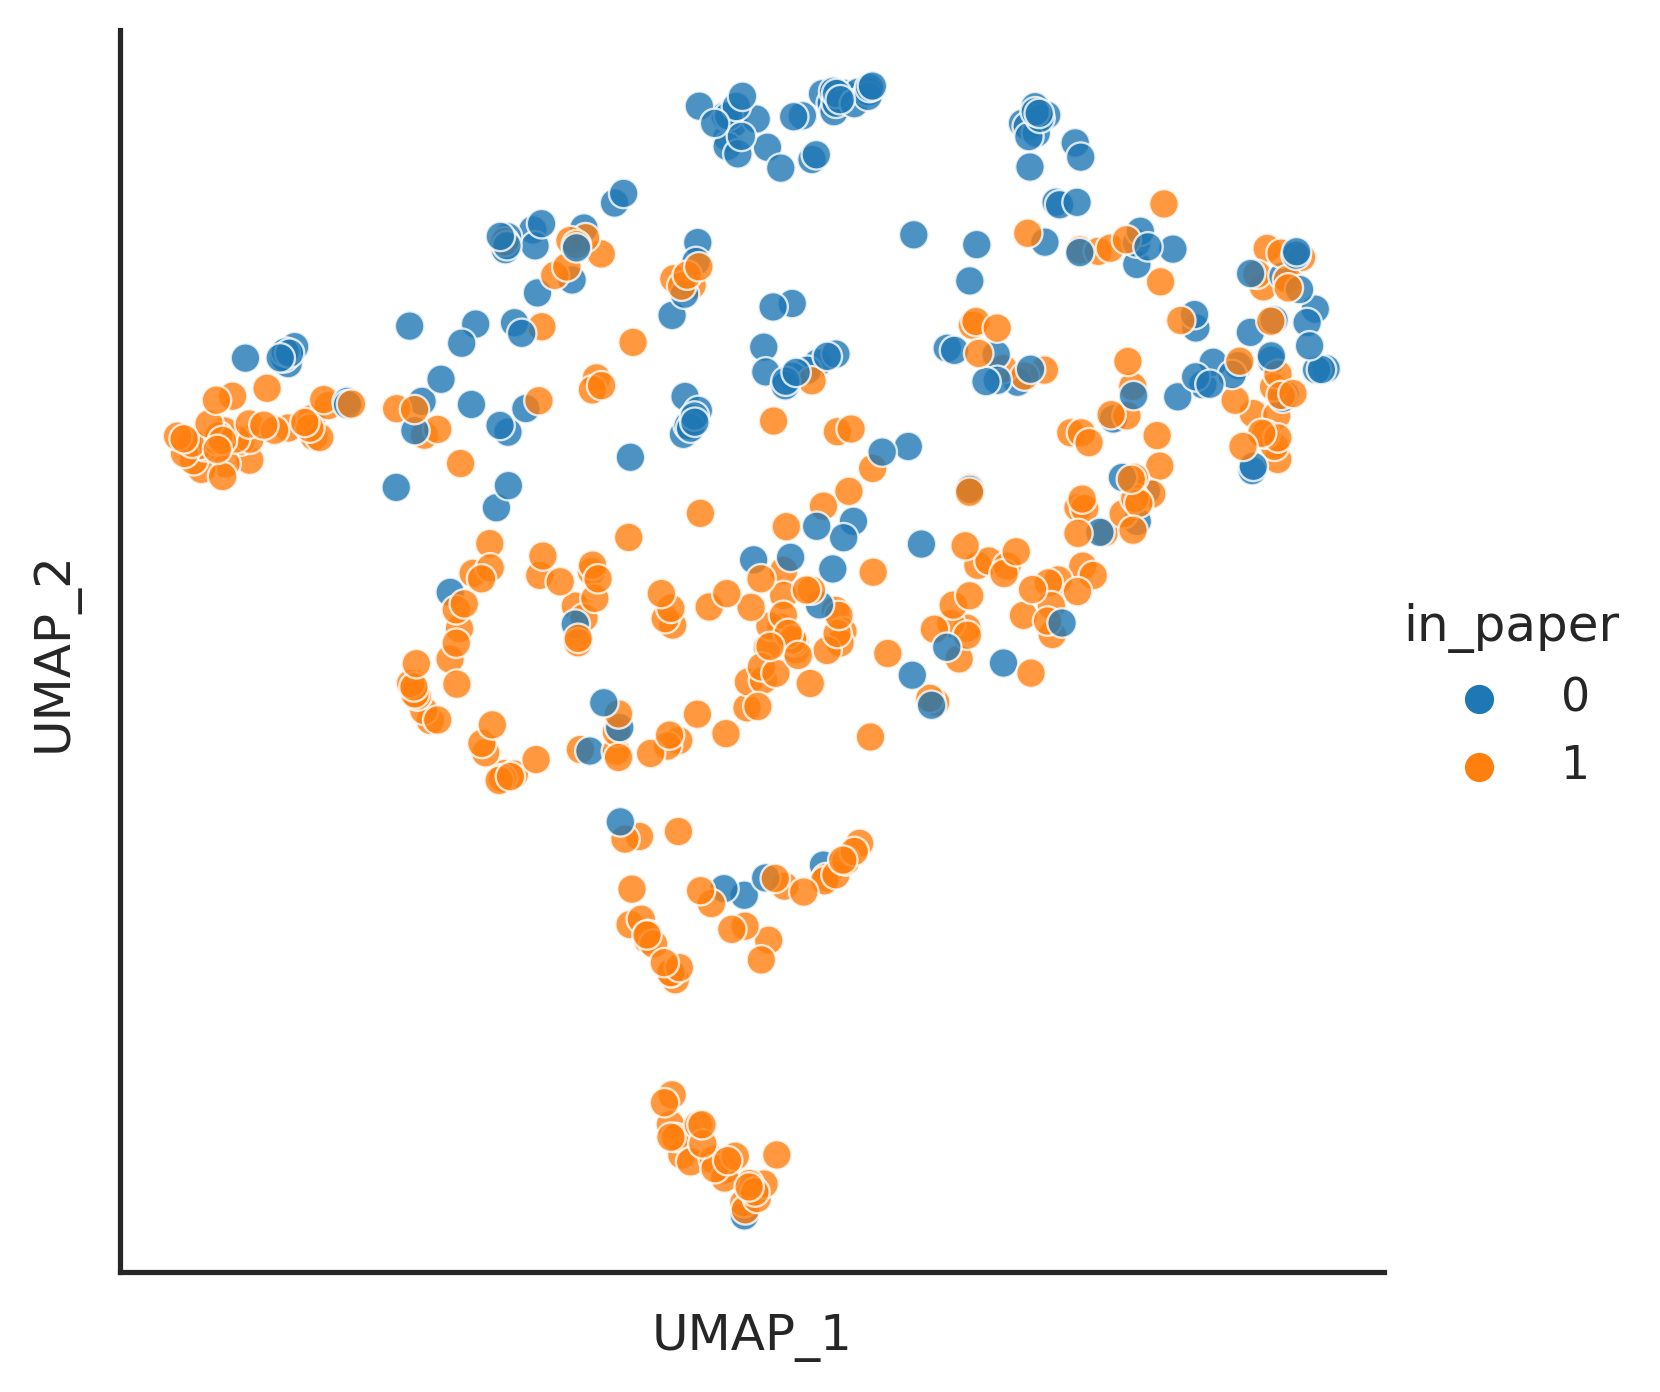

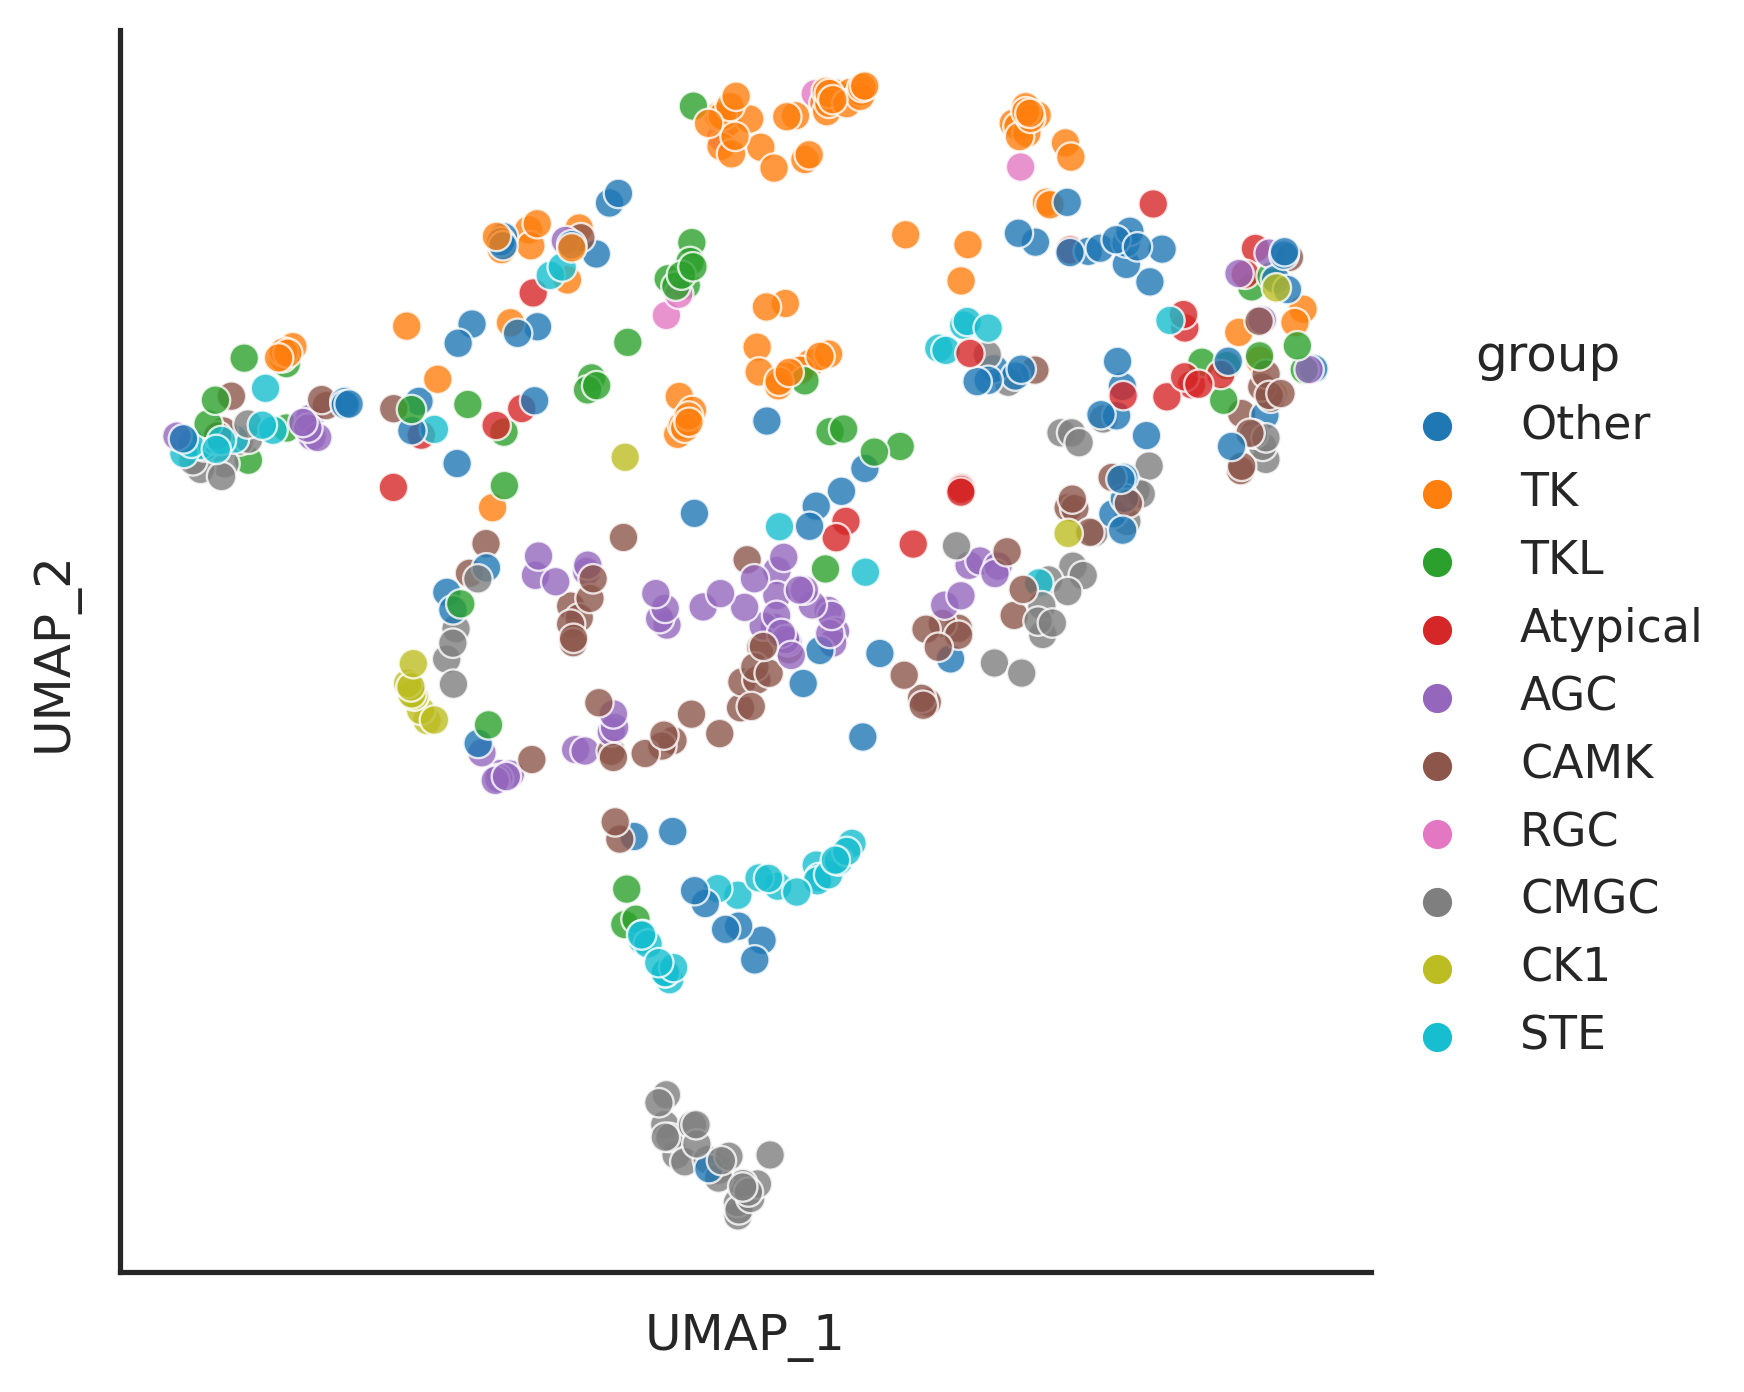

In [ ]:
for i in ['in_paper','group']:
    plot_cluster(feature, hue = combine[i], legend=True, method='umap',complexity=10,palette='tab10')

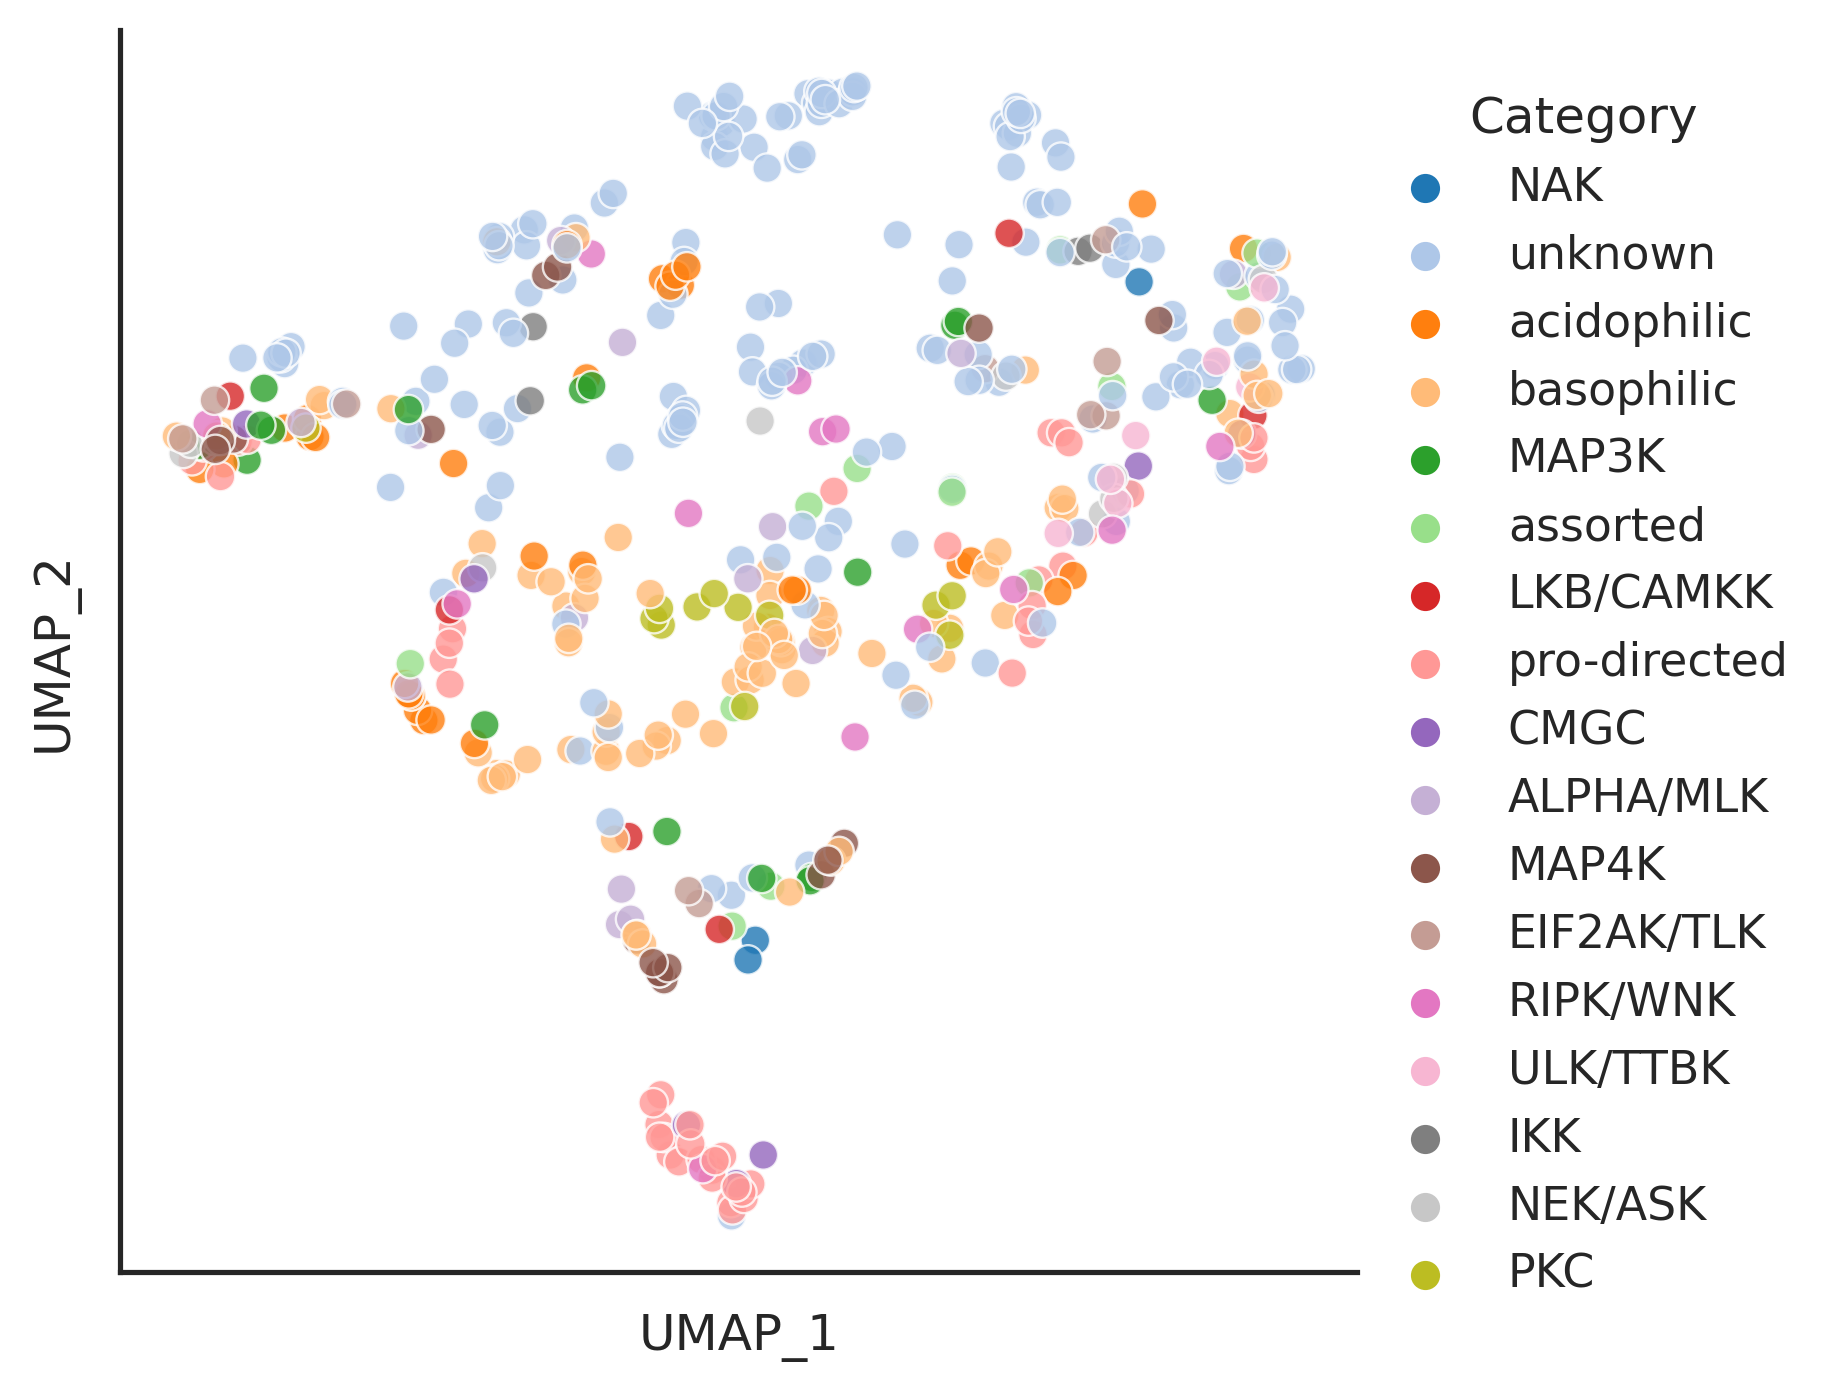

In [ ]:
for i in ['Category']:
    plot_cluster(feature, hue = combine[i], legend=True, method='umap',complexity=10,palette='tab20')

### PCA reduce

As the number of features is large (1280), we can reduce the feature number using PCA

In [ ]:
pcafeature = reduce_feature(esmfeature, 32) # , save = 'pca.pkl', save the pca for external test use

In [ ]:
# I have one saved, let's take a look
# pcafeature = Data.get_esm_pca32()

In [ ]:
pcafeature.head()

PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
kinase                                                                         
AAK1   -0.241704 -0.730024 -0.341984 -0.131454 -0.145157  0.291003  0.276707   
ABL1   -1.948869  0.649533 -0.074645 -0.011479  0.308095 -0.501901  0.134513   
ABL2   -2.065691  0.640081 -0.181042 -0.039737  0.311232 -0.494133  0.117340   
TNK2   -0.912916  1.153455  0.446243  0.119019  0.289635 -0.381010 -0.074285   
ACVR2A  2.318005  0.531382  0.153113 -0.326037 -0.277506 -0.069657  0.546187   

           PCA_8     PCA_9    PCA_10    PCA_11    PCA_12    PCA_13    PCA_14  \
kinase                                                                         
AAK1    0.434832  0.084902 -0.158652  0.174156 -0.113670 -0.240811  0.082980   
ABL1   -0.015080 -0.277546  0.053573  0.067158  0.200081 -0.074468 -0.053291   
ABL2    0.008033 -0.164699 -0.044926  0.004899  0.180120  0.077581 -0.044756   
TNK2    0.250728 -0.217244 -0.159987  0.050508  0.151572  0.008925  0.061990   
ACVR2A  0.287815 -0.039791  0.406021 -0.110509  0.025137  0.109068  0.051103   

          PCA_15    PCA_16    PCA_17    PCA_18    PCA_19    PCA_20    PCA_21  \
kinase                                                                         
AAK1    0.076774 -0.130464  0.113182 -0.086911  0.152598 -0.185369  0.252856   
ABL1   -0.100272  0.108670  0.116948 -0.000712 -0.085766  0.057570  0.067191   
ABL2   -0.050269  0.139492  0.106548 -0.003681  0.000762  0.053795  0.007360   
TNK2   -0.209947 -0.134289 -0.075979  0.079706  0.003312  0.075266  0.051901   
ACVR2A -0.171633 -0.088152 -0.081273 -0.156285  0.285569 -0.225278 -0.295999   

          PCA_22    PCA_23    PCA_24    PCA_25    PCA_26    PCA_27    PCA_28  \
kinase                                                                         
AAK1   -0.052867  0.367255  0.043618 -0.053540 -0.032705  0.030680 -0.079295   
ABL1   -0.120313 -0.170522  0.051835  0.062014 -0.067725 -0.074155  0.108983   
ABL2   -0.043359 -0.042632  0.058785  0.025659 -0.031119 -0.026445  0.031603   
TNK2   -0.230478  0.003193  0.028317  0.206170 -0.032023  0.108297 -0.037945   
ACVR2A  0.025102 -0.017362 -0.000136  0.154988  0.026246  0.052122  0.163191   

          PCA_29    PCA_30    PCA_31    PCA_32  
kinase                                          
AAK1    0.070556 -0.094916  0.128575  0.077158  
ABL1    0.056139 -0.041373  0.129307 -0.057034  
ABL2    0.054389 -0.063955  0.104560 -0.063849  
TNK2    0.003131 -0.076760  0.066692 -0.049511  
ACVR2A -0.001223 -0.031560 -0.007703  0.195939

In [ ]:
pcafeature.shape

(490, 32)

In [ ]:
# esmfeature.to_csv('esm_full.csv')
# pcafeature.to_csv('esm_pca32_full.csv')

## T5

The T5 (Text-To-Text Transfer Transformer) model is a transformer-based model. It consists of a transformer encoder-decoder framework. The encoder processes the input text, and the decoder generates the output text. Both the encoder and decoder are transformer models that use self-attention mechanisms to capture the relationships between words in the input and output sequences.

In [ ]:
import gc
gc.collect()

0

### T5_XL_UniRef50 (default)

UniRef50 is a cluster database from the UniProt Knowledgebase. It groups similar sequences based on 50% sequence identity using the CD-HIT algorithm. 

The Prot T5 is pretrained using this database.

In [ ]:
df.sort_values(by='length',ascending=False).length[:5]

kinase
TTN      32759
OBSCN     7968
OBSCN     7968
DNAPK     4128
TRRAP     3859
Name: length, dtype: int64

In [ ]:
df2 = df.query('length < 5000')

an example

In [ ]:
t5feature = get_t5(sample,'sequence')

  0%|          | 0/5 [00:00<?, ?it/s]

Uncheck below to implement full extraction

In [ ]:
# T5_feature = get_T5(df2,'sequence')

In [ ]:
# T5_feature.to_parquet('T5_xl_uniref50_full.parquet')

In [ ]:
T5_feature = Data.get_t5_full().set_index('kinase')

In [ ]:
T5_feature.head()

0         1         2         3         4         5         6  \
kinase                                                                         
AAK1    0.075806  0.123474  0.044220  0.024155 -0.020981  0.018646 -0.051666   
ABL1    0.009773  0.011375  0.031219 -0.000702  0.005157  0.050629 -0.024002   
ABL2    0.008186  0.000218  0.022705  0.001262 -0.000211  0.052795 -0.032776   
TNK2   -0.006798  0.018188  0.052704 -0.000522 -0.024979  0.052094 -0.026306   
ACVR2A  0.029007  0.103027  0.061066  0.005985 -0.013107  0.037109 -0.012222   

               7         8         9        10        11        12        13  \
kinase                                                                         
AAK1   -0.073914 -0.000199 -0.029678  0.011330 -0.004208 -0.042145  0.049408   
ABL1   -0.036987  0.051453 -0.007973  0.046448  0.010002  0.004505  0.031494   
ABL2   -0.038849  0.049347 -0.011497  0.037048  0.006649  0.011642  0.023026   
TNK2   -0.035461  0.051086  0.003067  0.041565  0.001478  0.019409  0.026810   
ACVR2A -0.060669  0.004623 -0.005775  0.030151  0.015556 -0.030258  0.020645   

              14        15        16        17        18        19        20  \
kinase                                                                         
AAK1    0.072815  0.027420  0.046356 -0.019913 -0.009010 -0.006969 -0.075195   
ABL1   -0.000252  0.019775 -0.009544  0.027283 -0.010986 -0.005871 -0.035248   
ABL2   -0.000995  0.013954 -0.019485  0.018616 -0.012405 -0.009422 -0.027756   
TNK2    0.004837  0.015038 -0.021790  0.048340 -0.032654  0.009674  0.000388   
ACVR2A  0.089172  0.001034  0.022202 -0.037781 -0.020264 -0.018387 -0.075317   

              21        22        23        24        25        26        27  \
kinase                                                                         
AAK1    0.005646  0.066467 -0.017838 -0.037292 -0.032257  0.033264 -0.050903   
ABL1   -0.033020  0.075745  0.000078 -0.009499 -0.028503  0.005245 -0.061188   
ABL2   -0.030579  0.074036  0.007080 -0.001696 -0.024658  0.011650 -0.056335   
TNK2   -0.029892  0.065674  0.007015 -0.035980 -0.015030 -0.016449 -0.041351   
ACVR2A  0.010017  0.061615  0.009468 -0.007374 -0.026215  0.011856 -0.051971   

              28        29        30        31        32        33        34  \
kinase                                                                         
AAK1   -0.030777 -0.001095 -0.010994  0.090637 -0.113647 -0.023529 -0.119446   
ABL1   -0.024872  0.025803  0.020279  0.055511 -0.121155  0.002825 -0.129272   
ABL2   -0.024811  0.014137  0.010910  0.054047 -0.122253  0.012665 -0.128540   
TNK2   -0.049042  0.011864  0.022644  0.060852 -0.123535 -0.004292 -0.123535   
ACVR2A -0.011002  0.011406 -0.017639  0.062866 -0.112061 -0.022629 -0.121094   

              35        36        37        38        39        40        41  \
kinase                                                                         
AAK1    0.000334  0.041321  0.052979 -0.010551  0.049133 -0.024902 -0.056641   
ABL1    0.008331  0.003757  0.013756  0.026489  0.020355  0.013741 -0.048248   
ABL2    0.012924  0.003801  0.005959  0.026215  0.026871  0.010727 -0.053619   
TNK2    0.039673  0.002089  0.016846  0.031616  0.036224 -0.004791 -0.029251   
ACVR2A  0.013161  0.045197  0.055756 -0.016953  0.063843 -0.036804 -0.033844   

              42        43        44        45        46        47        48  \
kinase                                                                         
AAK1   -0.027313 -0.003847 -0.008194 -0.022583 -0.014557 -0.013809 -0.039062   
ABL1   -0.021942 -0.000970 -0.014015 -0.005844  0.014473 -0.007687  0.030441   
ABL2   -0.019150  0.009125 -0.009651 -0.002460  0.018890  0.010353  0.028564   
TNK2   -0.017075 -0.001931 -0.017593  0.005722  0.025879  0.001980  0.039886   
ACVR2A -0.048645  0.012260 -0.008698 -0.011284  0.009644  0.007507 -0.014481   

              49        50        51        52        53        54        55  \
kinase  

#### Visualize

In [ ]:
combine = pd.concat([df2,T5_feature],axis=1)

In [ ]:
combine = combine.query('pseudo == 0')

In [ ]:
feat_col = combine.columns[-1024:]

In [ ]:
feature = combine[feat_col]

In [ ]:
combine['Category'] = combine['category_big'].fillna('unknown')

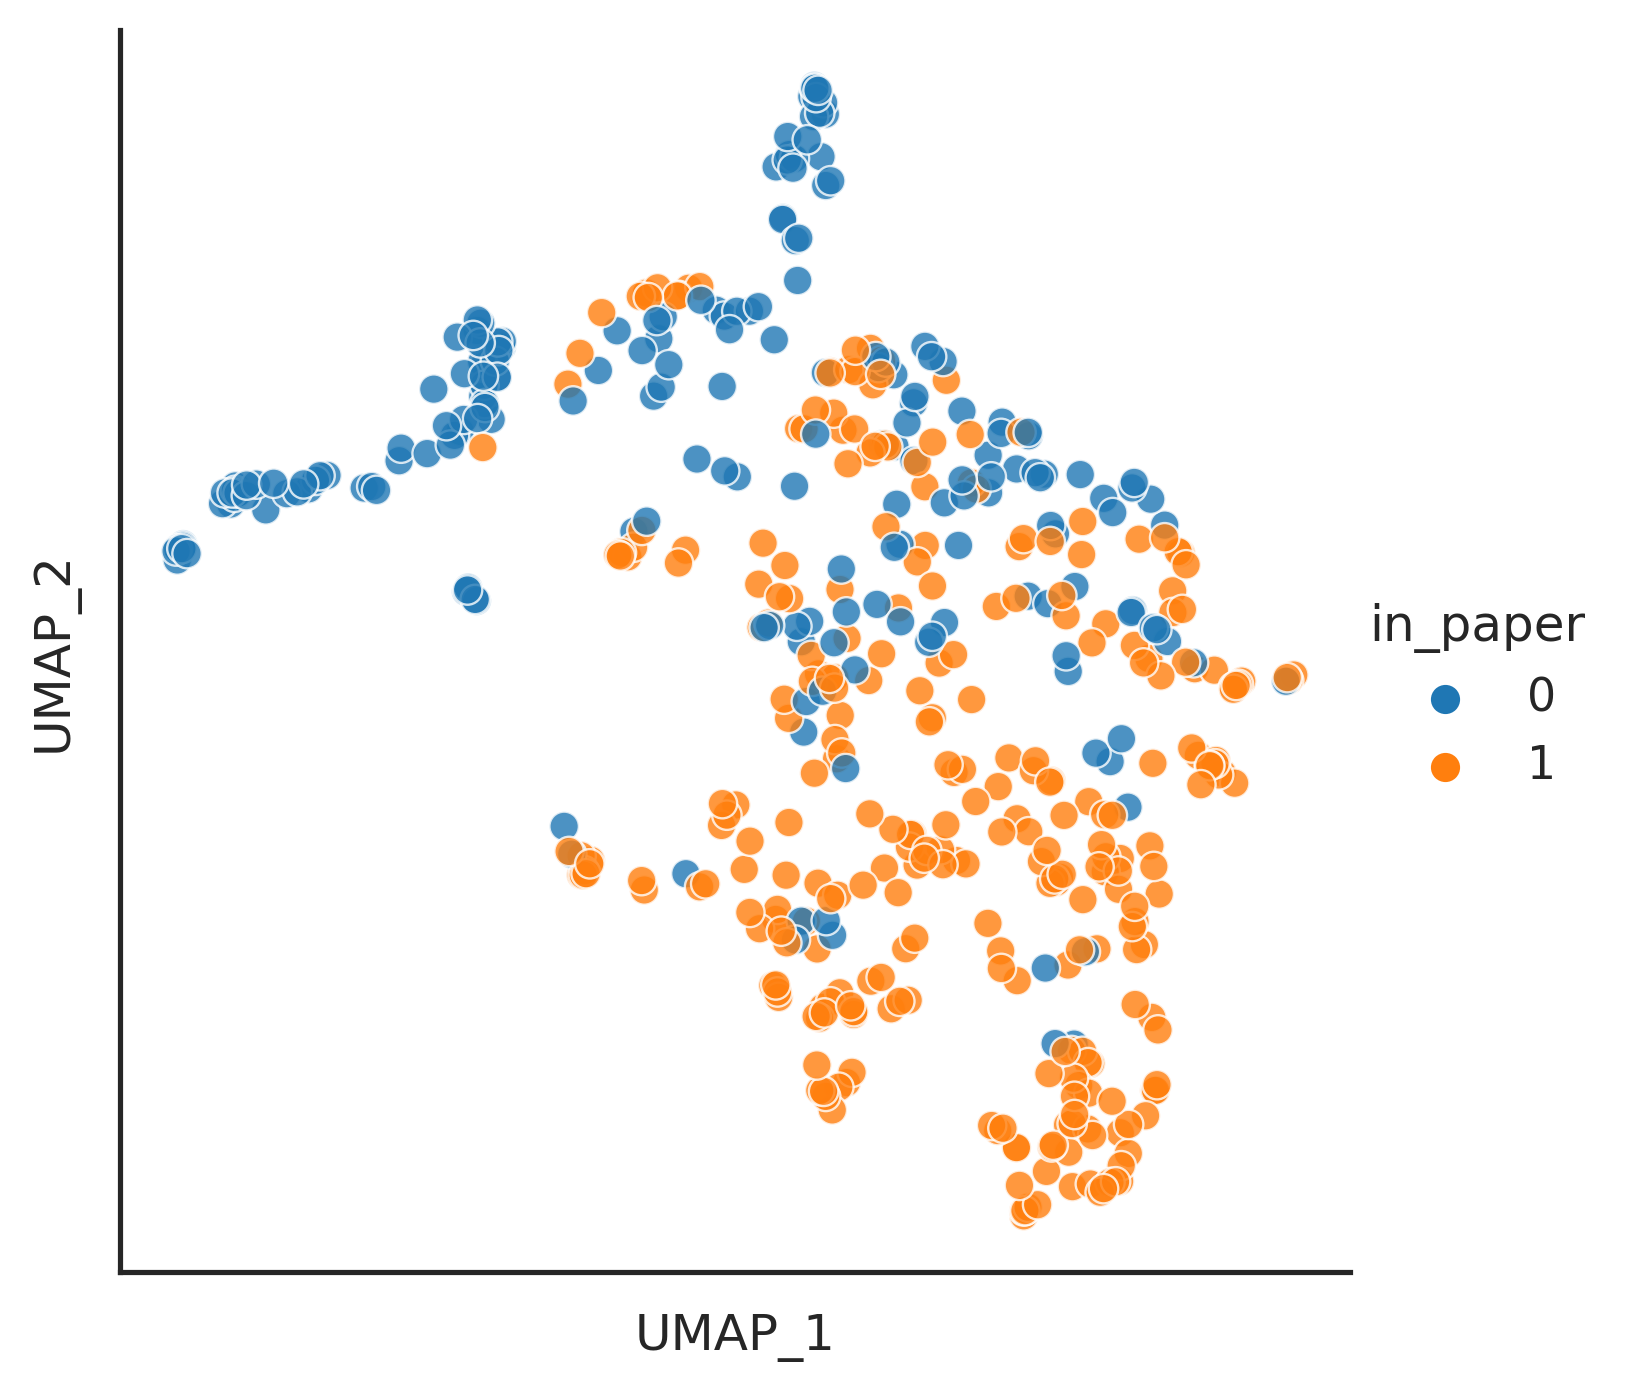

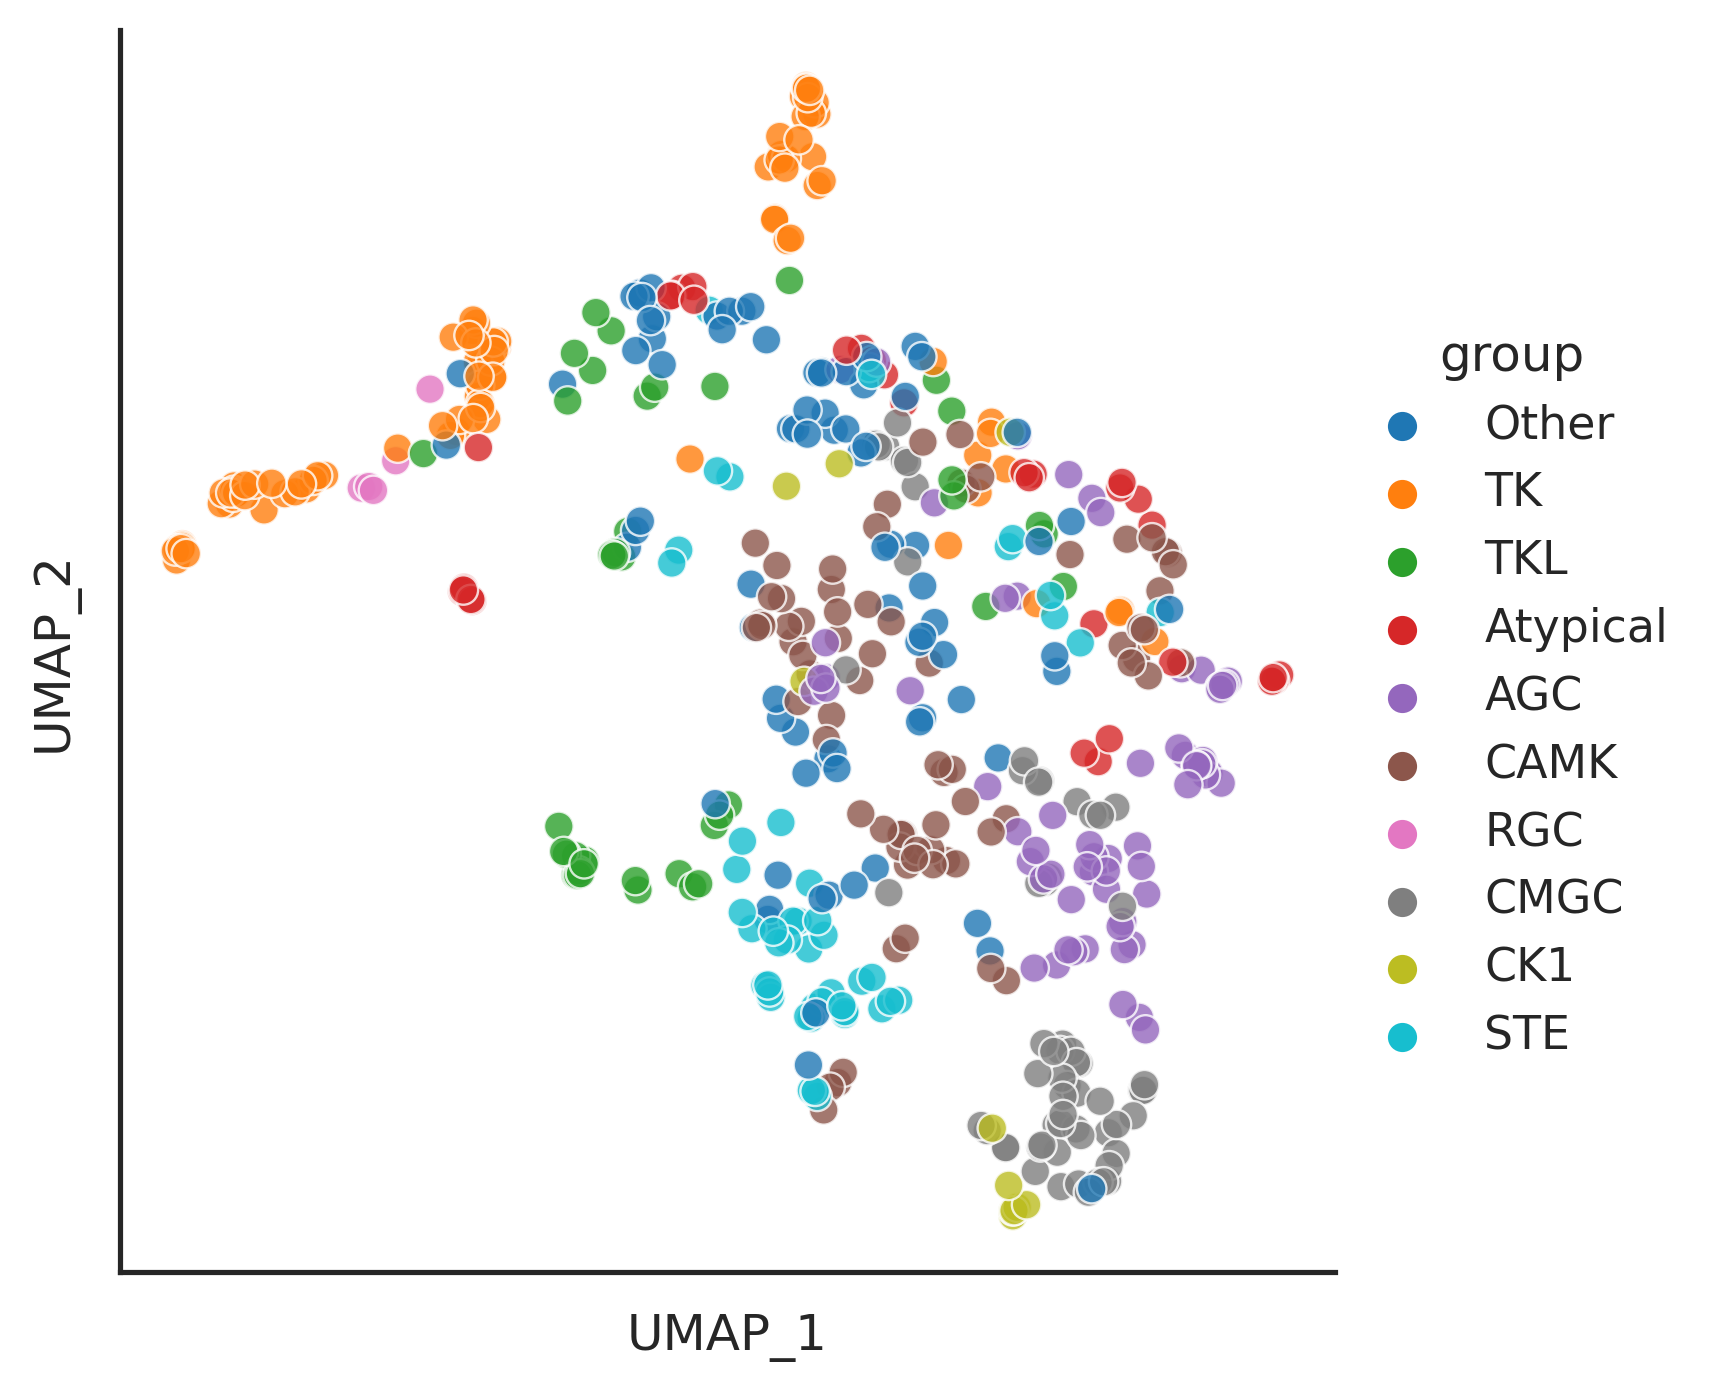

In [ ]:
for i in ['in_paper','group']:
    plot_cluster(feature,'umap',hue=combine[i],legend=True, complexity=12,palette='tab10')

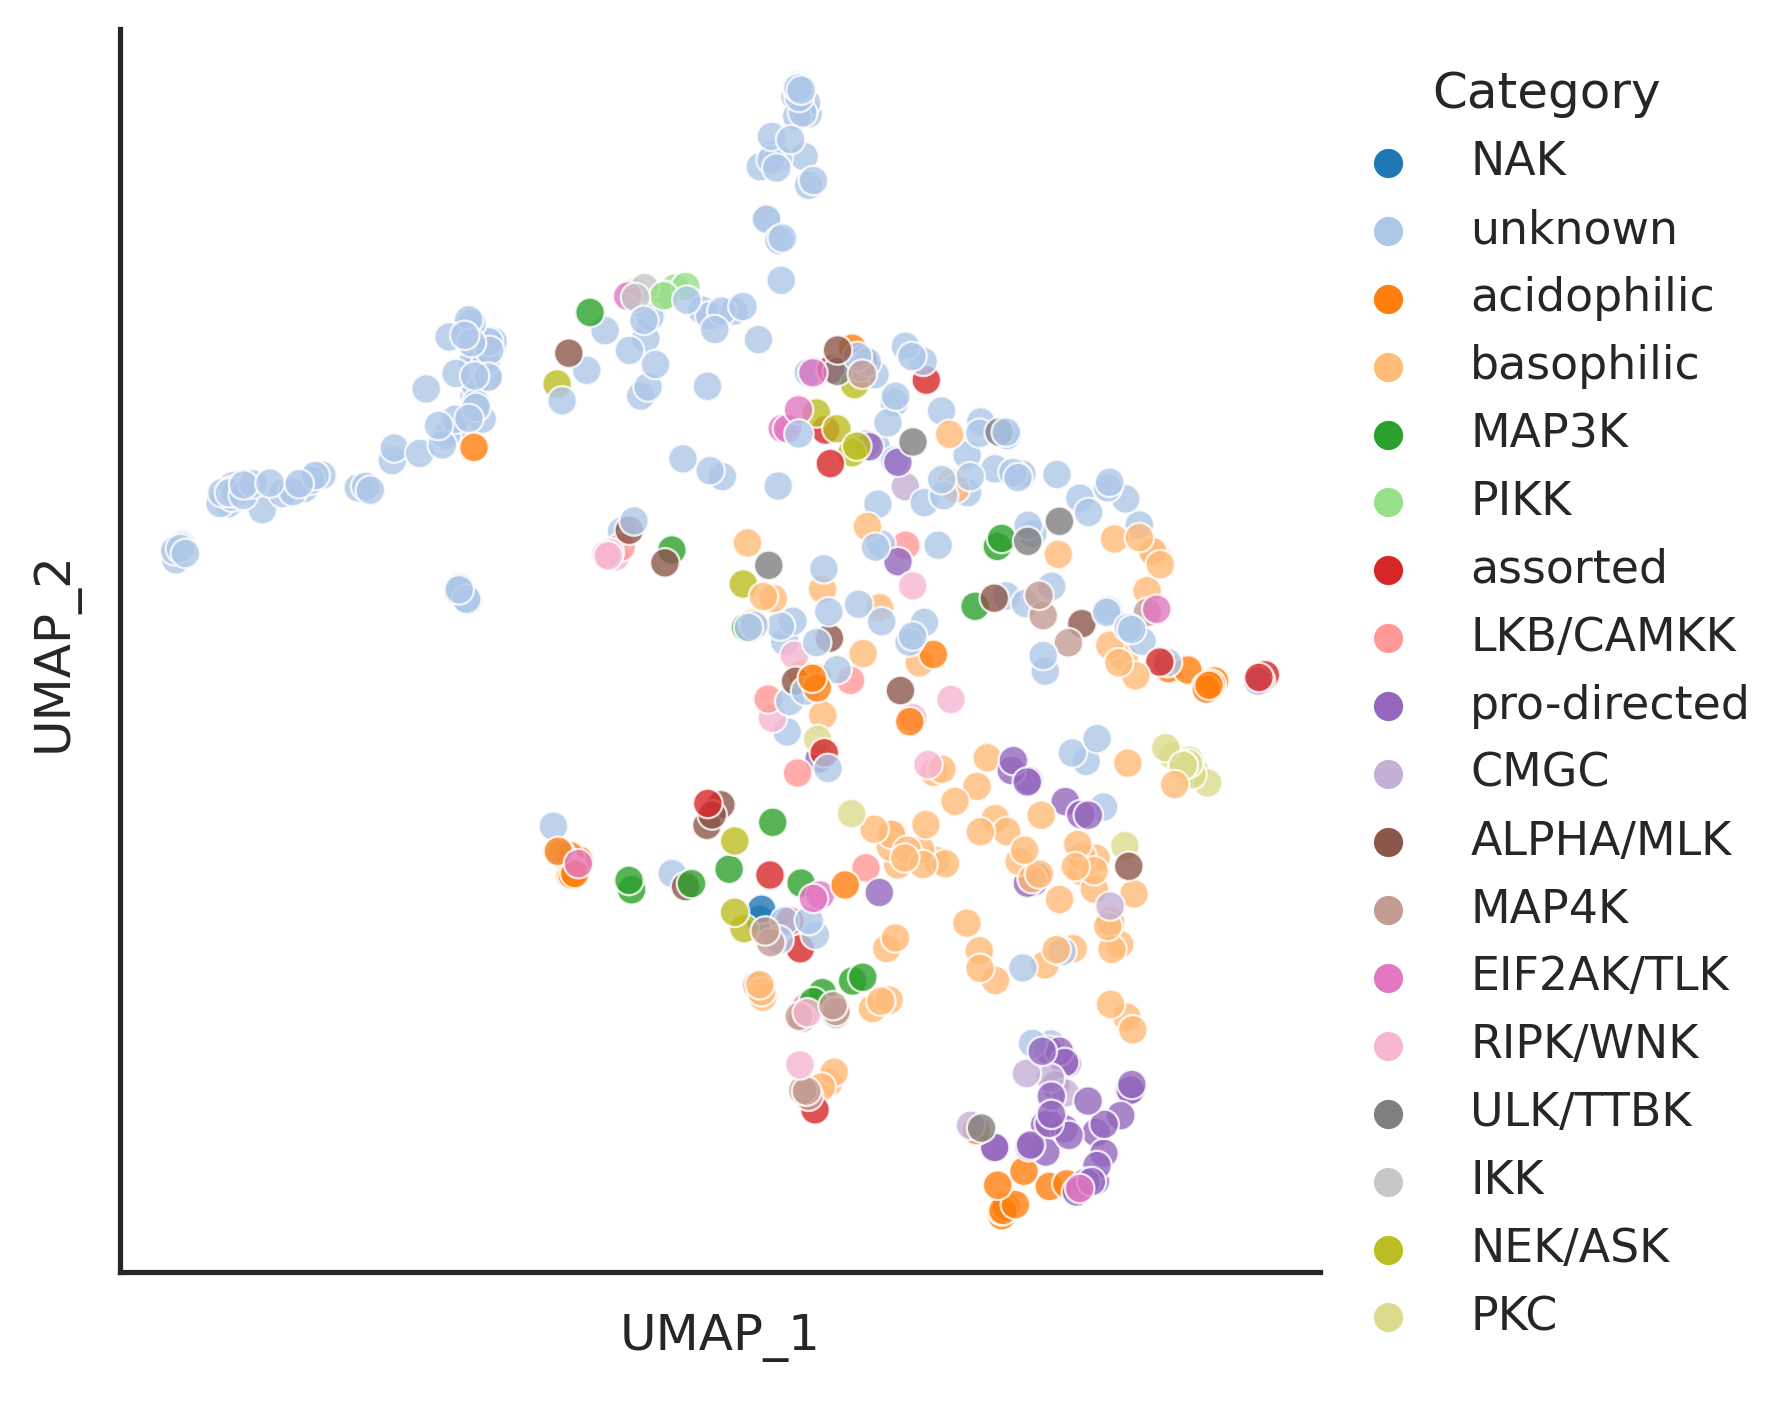

In [ ]:
for i in ['Category']:
    plot_cluster(feature,'umap',hue=combine[i],legend=True, complexity=12,palette='tab20')

### T5_XL_BFD

BFD is a database created by clustering 2.5 billion protein sequences from various sources including Uniprot/TrEMBL+Swissprot.

As our RAM is limited, we need to get sequence below 1000

In [ ]:
df3 = df.query('length < 1000')

Uncheck below to implement

In [ ]:
T5_feature = get_t5_bfd(df3,'sequence')

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.74k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/457 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.5G [00:00<?, ?B/s]

  0%|          | 0/432 [00:00<?, ?it/s]

In [ ]:
T5_feature.to_parquet('T5_xl_bfd.parquet')

In [ ]:
T5_feature.shape

(432, 1024)

In [ ]:
# T5_feature= Data.get_t5_bfd_full().set_index('kinase')

#### Visualize

Since PCA plot cannot reflect the cluster very well, we use umap; after trying different n_neigbors (complexity) value, we found 10 is the best; the lower, the more clustered the dots

In [ ]:
combine = pd.concat([df3,T5_feature],axis=1)

In [ ]:
combine = combine.query('pseudo == 0')

In [ ]:
combine['Category'] = combine['category_big'].fillna('unknown')

In [ ]:
feat_col = combine.columns[-1024:]

In [ ]:
feature = combine[feat_col]

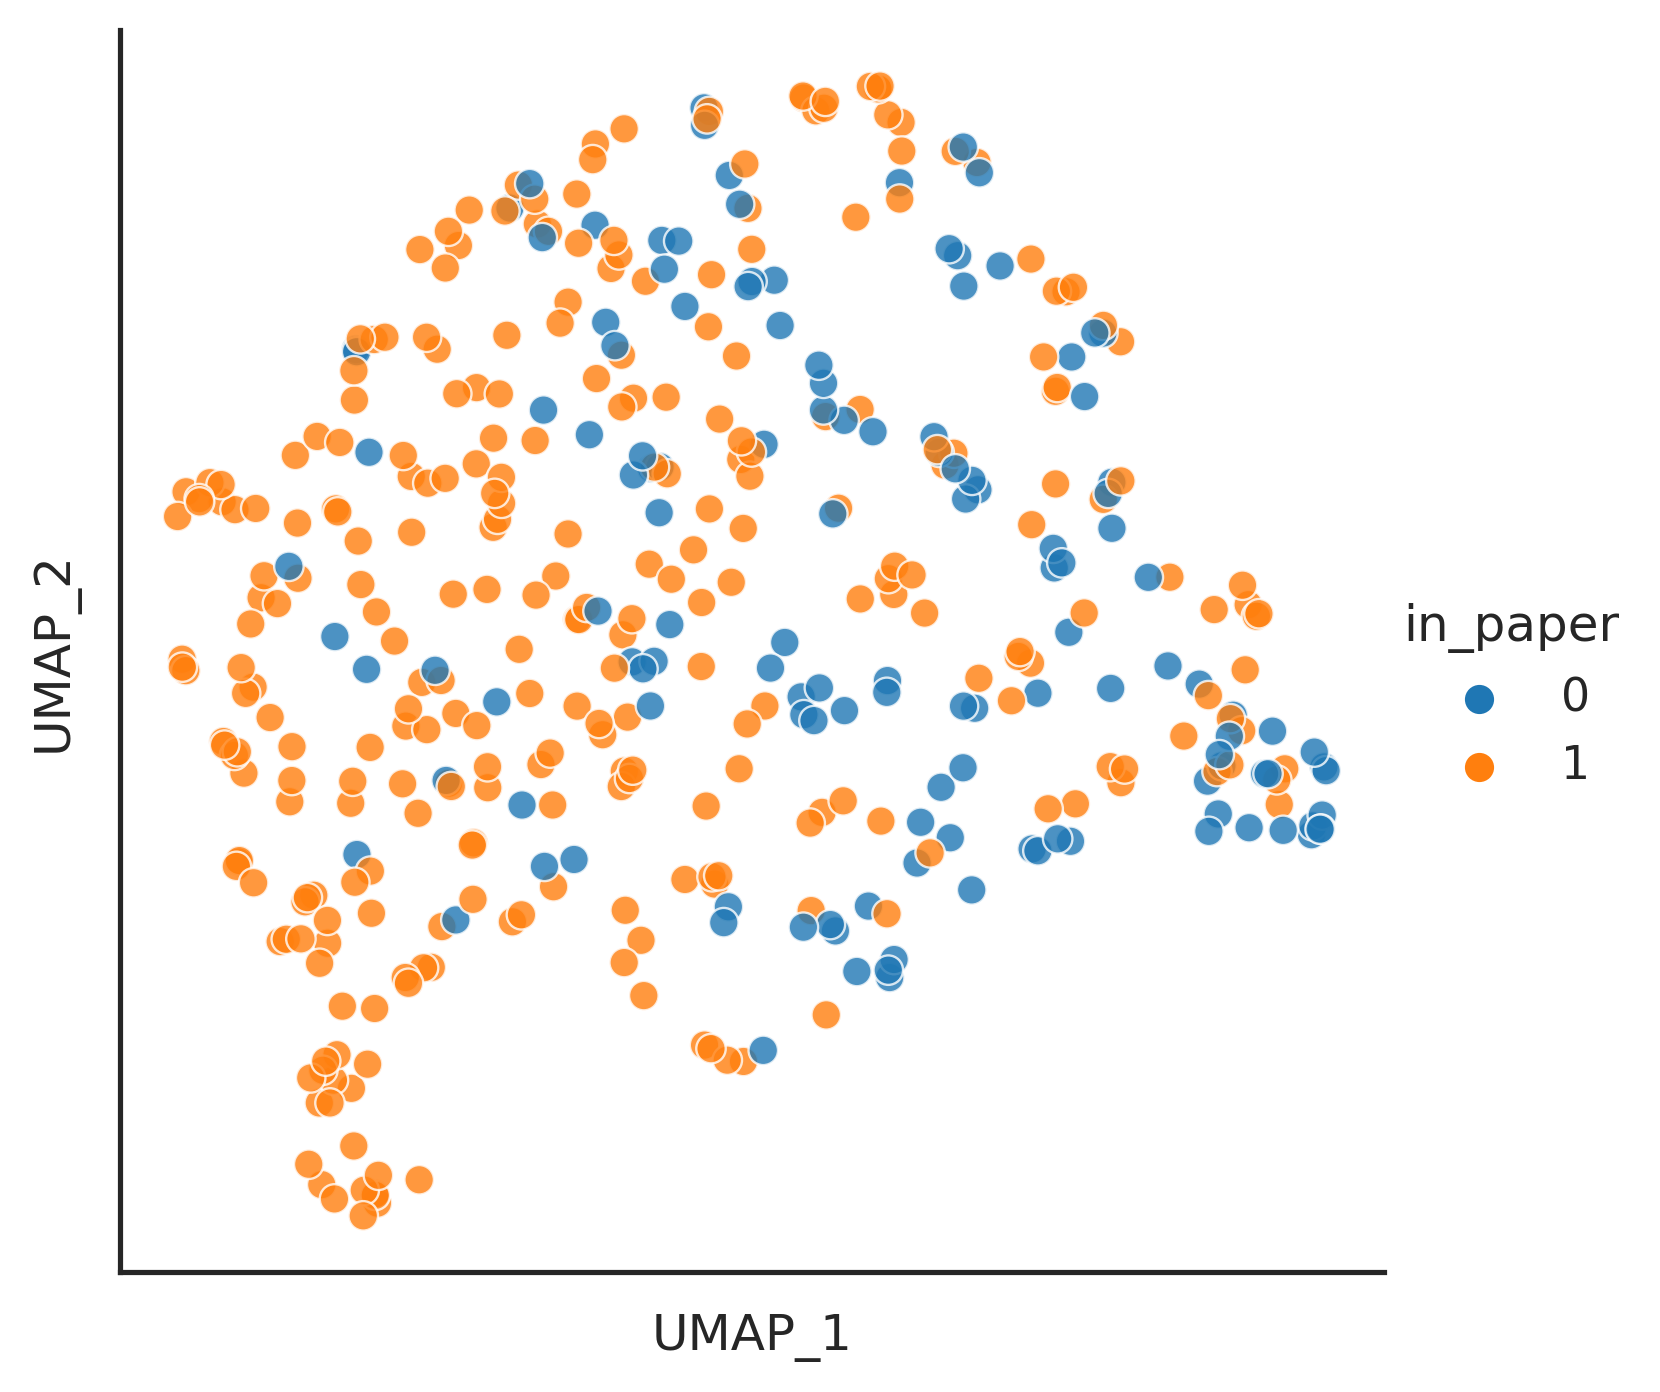

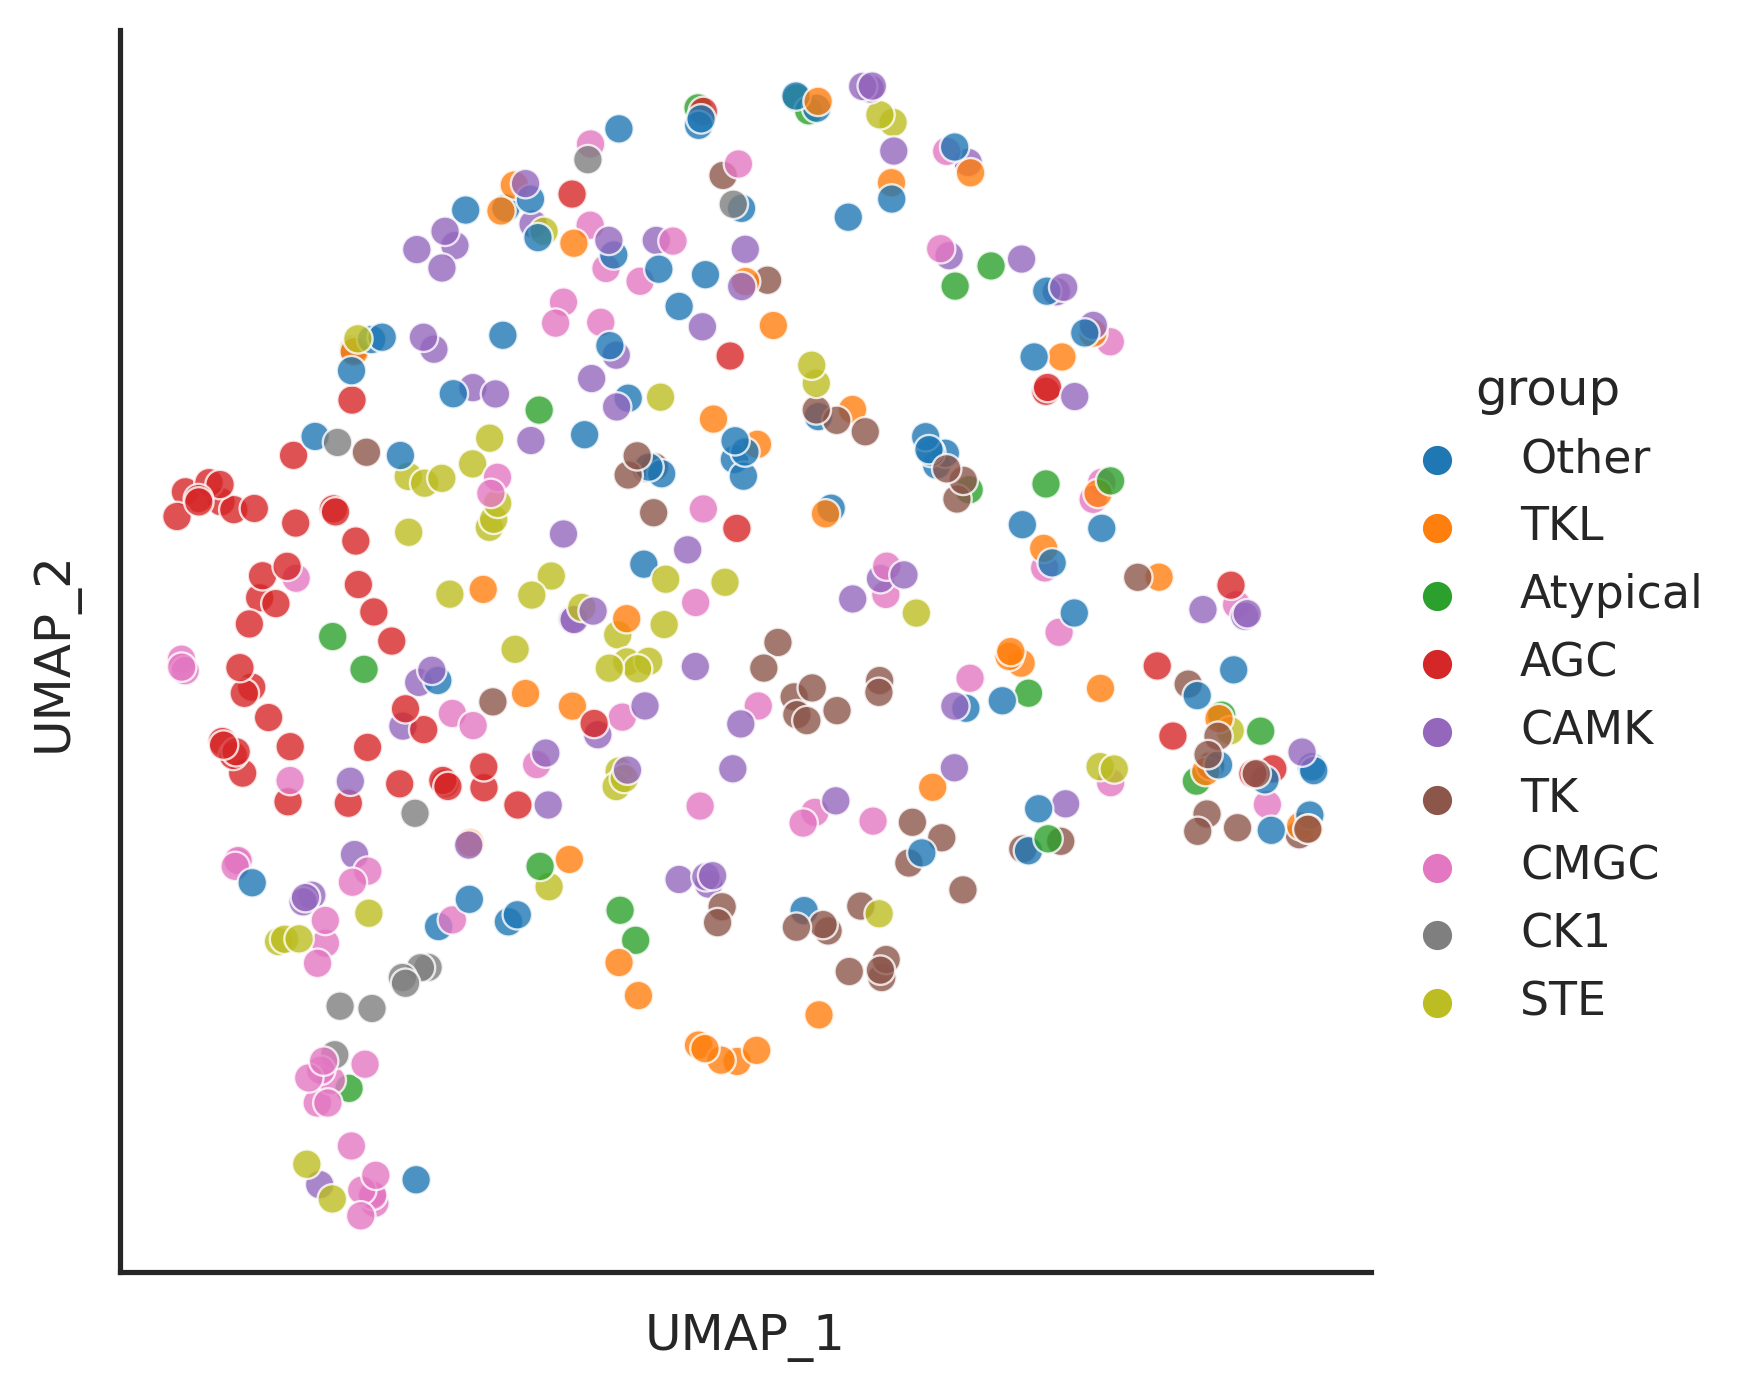

In [ ]:
for i in ['in_paper', 'group']:
    plot_cluster(feature,'umap',hue=combine[i],legend=True, complexity=7, palette='tab10')

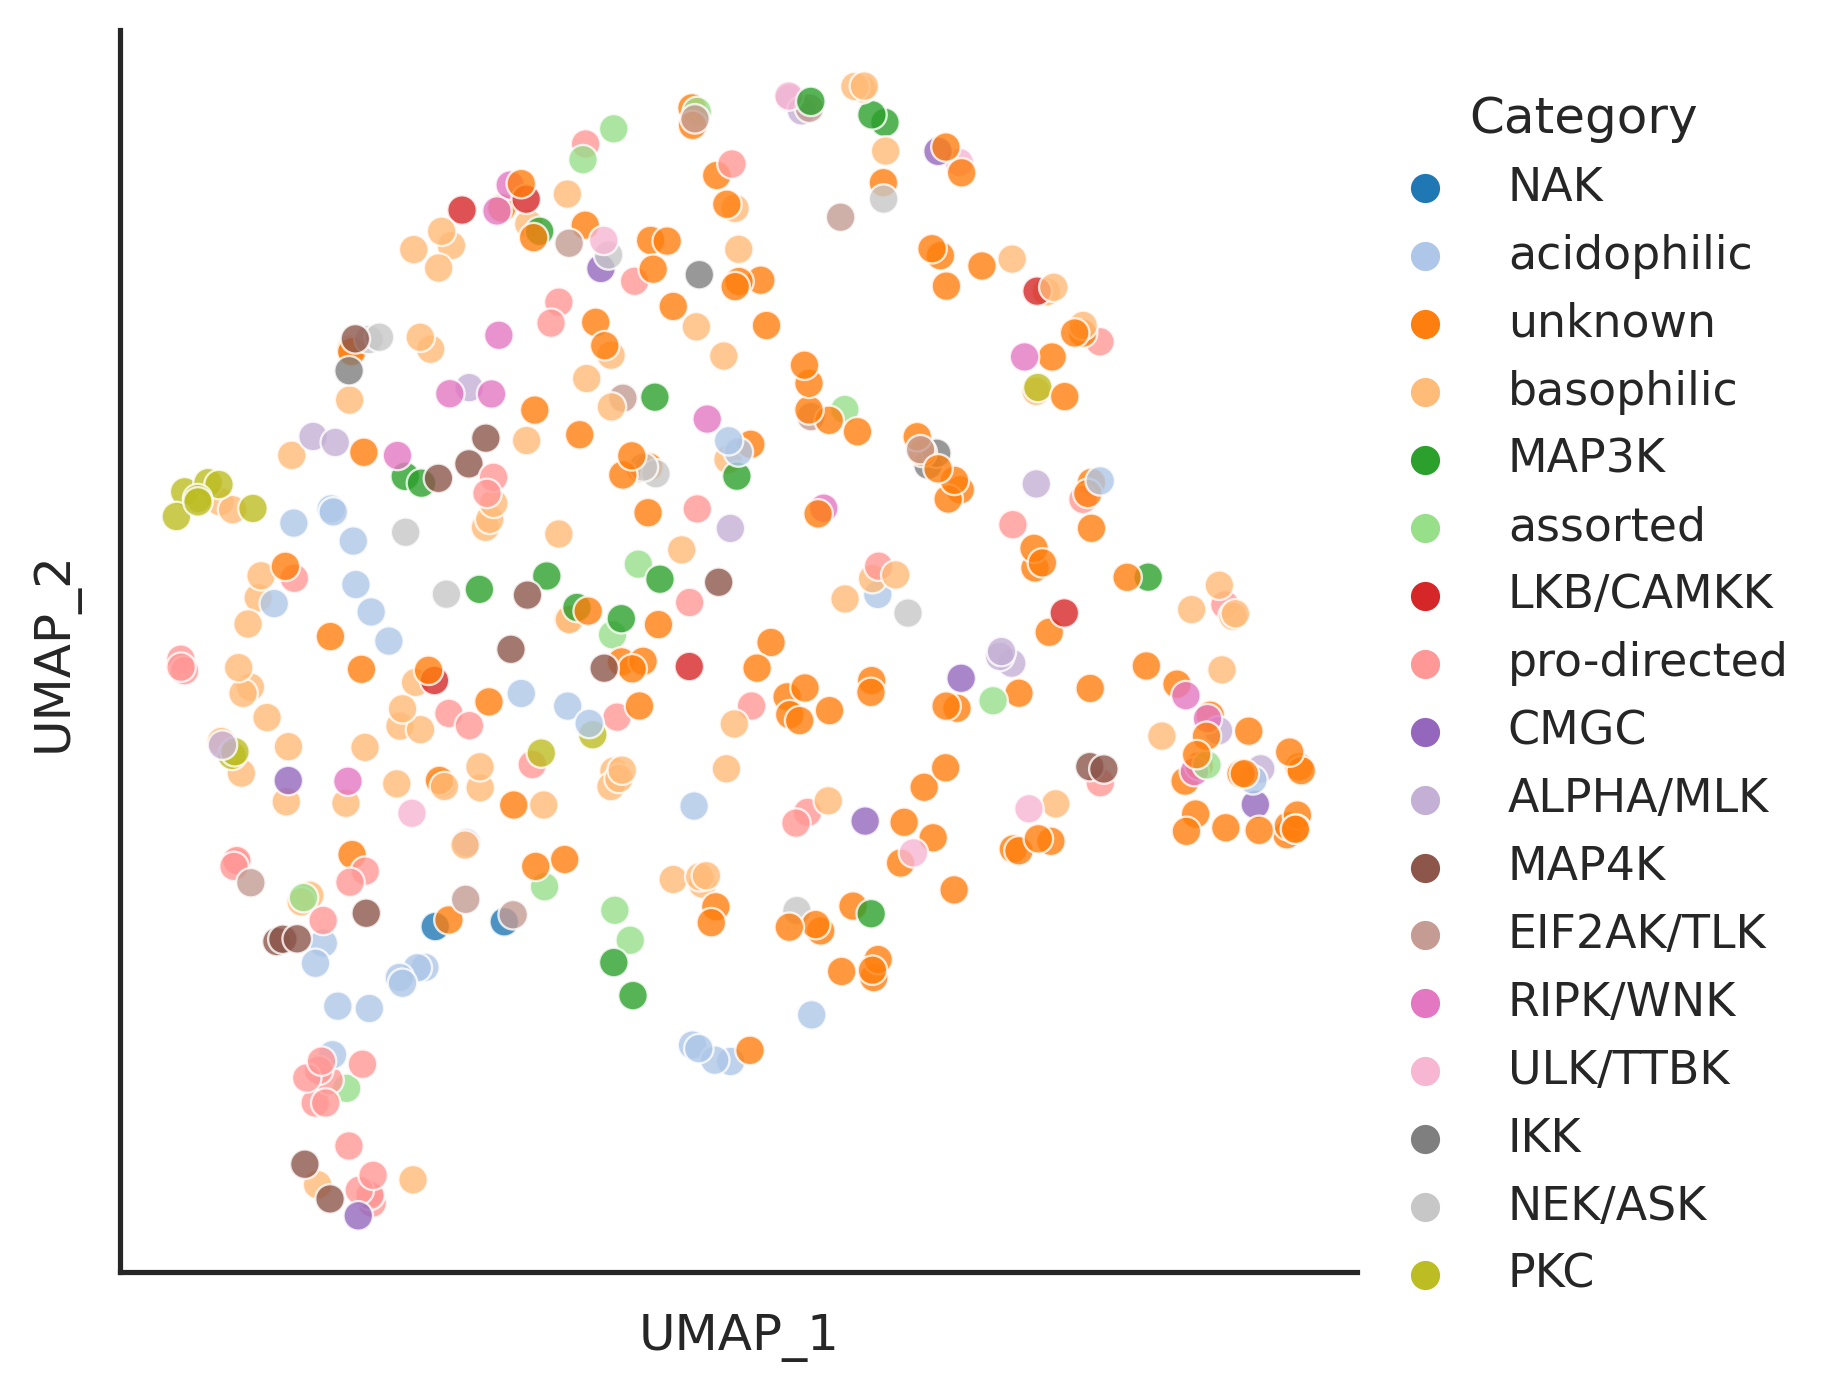

In [ ]:
for i in ['Category']:
    plot_cluster(feature,'umap',hue=combine[i],legend=True, complexity=7, palette='tab20')